<a href="https://colab.research.google.com/github/FelipPalermo/DataEng_SC23/blob/main/E8_Tratamento_DadosBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install gcsfs
#pip install pandera 
#pip install pyspark

##***Importacoes***

In [ ]:
# Importando pandas
import pandas as pd
import numpy as np
import pandera as pa

# Importando Pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.types import *
from pyspark.sql.window import Window
from pyspark.sql.functions import *

# Importando GCSFS
import os 
from google.cloud import storage 
from google.colab import drive

##***Acessando dados privados da bucket***

In [ ]:
# Recebendo a chave de seguranca da api da GCSFS 
drive.mount('/content/drive')
serviceAccount = '/content/lunar-reef-355417-ecfe16be5ae7.json' 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

# Recebendo arquivo da bucket privada do nosso projeto
client = storage.Client() 
bucket = client.get_bucket('bucket_e8_pf') 
bucket.blob ('GDP_Mundial.csv')
path = "gs://bucket_e8_pf/DadosBrasil.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando Arquivo da bucket
df = pd.read_csv(path)

##***Tratamento Pandas***

In [ ]:
# Verificando tipo das colunas 
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object

In [ ]:
# Dropando colunas que nao vamos usar 
# Anos anteriores a 1995 nao vao entrar na nossa analise
# "Country name" e "Country code" so contem um valor, Brasil e BRA 
df.drop(columns=["Country Name", "Country Code", "Indicator Code",
                 "1960", "1961", "1962", "1963", "1964", "1965", "1966", "1967",
                 "1968", "1969", "1970", "1971", "1972", "1973", "1973", "1974",
                 "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982",
                 "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990",
                 "1991", "1992", "1993", "1994", "1994", "Unnamed: 66"], inplace=True )

In [ ]:
# Dropando linhas que nao vamos usar
# Nesse caso, cada linha representa uma pesquisa diferente 
df.drop([0, 1, 4, 5, 9, 8, 10, 12, 14, 16, 17, 18, 20, 22, 23, 
         24, 25, 26, 28, 29, 30, 32, 33, 40, 42, 44, 45, 46, 
         46, 48, 49, 50, 51, 52, 53, 55, 54, 56, 57, 58, 59, 
         60, 61, 62], inplace = True)

In [ ]:
# Contando as colunas novamente 
df.reset_index(drop=True, inplace=True)

In [ ]:
# Preenchendo os valores nulos com np.Nan
df.fillna(value=np.NAN, inplace=True)

In [ ]:
# Indicando para o pandas que queremos apenas 5 casas decimais
# apos o ponto dos numeros float 
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
# Renomeando colunas remanescentes 
df.rename(columns={"Indicator Name" : "Indicador"}, inplace = True)

##***Regex com pandera***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicador  20 non-null     object 
 1   1995       18 non-null     float64
 2   1996       17 non-null     float64
 3   1997       17 non-null     float64
 4   1998       18 non-null     float64
 5   1999       18 non-null     float64
 6   2000       17 non-null     float64
 7   2001       18 non-null     float64
 8   2002       18 non-null     float64
 9   2003       17 non-null     float64
 10  2004       19 non-null     float64
 11  2005       18 non-null     float64
 12  2006       20 non-null     float64
 13  2007       20 non-null     float64
 14  2008       20 non-null     float64
 15  2009       20 non-null     float64
 16  2010       18 non-null     float64
 17  2011       20 non-null     float64
 18  2012       20 non-null     float64
 19  2013       20 non-null     float64
 20  2014       2

In [ ]:
# Criando schema para validar o dataframe

schema = pa.DataFrameSchema(
    columns={
        "Indicador" : pa.Column(pa.String),
        "1995" : pa.Column(pa.Float, nullable=True),
        "1996" : pa.Column(pa.Float, nullable=True),
        "1997" : pa.Column(pa.Float, nullable=True),
        "1998" : pa.Column(pa.Float, nullable=True),
        "1999" : pa.Column(pa.Float, nullable=True),
        "2000" : pa.Column(pa.Float, nullable=True),
        "2001" : pa.Column(pa.Float, nullable=True),
        "2002" : pa.Column(pa.Float, nullable=True),
        "2003" : pa.Column(pa.Float, nullable=True),
        "2004" : pa.Column(pa.Float, nullable=True),
        "2005" : pa.Column(pa.Float, nullable=True),
        "2007" : pa.Column(pa.Float, nullable=True),
        "2008" : pa.Column(pa.Float, nullable=True),
        "2009" : pa.Column(pa.Float, nullable=True),
        "2010" : pa.Column(pa.Float, nullable=True),
        "2011" : pa.Column(pa.Float, nullable=True),
        "2012" : pa.Column(pa.Float, nullable=True),
        "2013" : pa.Column(pa.Float, nullable=True),
        "2014" : pa.Column(pa.Float, nullable=True),
        "2015" : pa.Column(pa.Float, nullable=True),
        "2016" : pa.Column(pa.Float, nullable=True),
        "2017" : pa.Column(pa.Float, nullable=True),
        "2018" : pa.Column(pa.Float, nullable=True),
        "2019" : pa.Column(pa.Float, nullable=True),
        "2020" : pa.Column(pa.Float, nullable=True),
        "2021" : pa.Column(pa.Float, nullable=True),
    }
)

In [ ]:
# Validando schema
schema.validate(df)

,Indicador,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Comércio de mercadorias (% do PIB),13.08185,12.31476,13.27391,12.94322,16.63993,17.35637,20.83436,21.60907,22.22797,...,19.28247,19.60620,18.79795,20.37729,18.08627,18.45604,22.15674,22.11560,25.92329,32.03922
1,"População, total",162019889.00000,164614682.00000,167209046.00000,169785253.00000,172318674.00000,174790339.00000,177196051.00000,179537523.00000,181809244.00000,...,199287292.00000,201035904.00000,202763744.00000,204471759.00000,206163056.00000,207833825.00000,209469320.00000,211049519.00000,212559409.00000,213993441.00000
2,"Expectativa de vida no nascimento, total (anos)",68.31800,68.69500,69.06100,69.41900,69.76900,70.11600,70.46200,70.81300,71.17000,...,74.20900,74.48300,74.74500,74.99400,75.23000,75.45600,75.67200,75.88100,76.08400,NaN
3,Taxa de mortalidade infantil (por 1.000 nascid...,41.10000,38.70000,36.50000,34.30000,32.30000,30.40000,28.50000,26.80000,25.10000,...,15.40000,14.90000,14.60000,14.20000,15.00000,13.80000,13.60000,13.30000,13.10000,NaN
4,"Desemprego, total (% da força de trabalho total)",6.42000,7.25000,8.16000,9.42000,10.21000,9.56100,9.61000,9.37000,9.99000,...,7.19000,6.98000,6.66000,8.43000,11.60000,12.82000,12.33000,11.93000,13.69000,14.40300
5,Índice de Gini,59.60000,59.90000,59.80000,59.60000,59.00000,NaN,58.40000,58.10000,57.60000,...,53.40000,52.70000,52.00000,51.90000,53.30000,53.30000,53.90000,53.50000,48.90000,NaN
6,Participação da renda dos 20% mais pobres,2.40000,2.20000,2.30000,2.40000,2.50000,NaN,2.50000,2.60000,2.60000,...,3.40000,3.50000,3.60000,3.60000,3.30000,3.20000,3.10000,3.10000,4.50000,NaN
7,"Taxa de mortalidade, menores de 5 anos (por 1....",48.00000,45.00000,42.20000,39.60000,37.10000,34.70000,32.50000,30.40000,28.40000,...,17.20000,16.70000,16.30000,15.90000,16.70000,15.40000,15.20000,14.90000,14.70000,NaN
8,"Despesa pública na educação, total (% do PIB)",4.56816,NaN,NaN,4.75666,3.80062,3.94893,3.84468,3.75037,NaN,...,5.85510,5.83885,5.94848,6.24106,6.31404,6.32048,6.08851,NaN,NaN,NaN
9,"Taxa de alfabetização, total de adultos (% de ...",NaN,NaN,NaN,NaN,NaN,86.36788,NaN,NaN,NaN,...,91.33785,91.48424,91.72943,92.04790,92.80844,93.07582,93.22750,NaN,NaN,NaN


##***Salvando DataFrame Para Excel***

***Foi necessario fazer um transpose nesse dataframe para conseguirmos fazer uma analise melhor, fizemos isso passando o arquivo para xlsx e rearranjando manualmente o arquivo***

In [ ]:
# Salvando DataFrame para excel, pois vamos inverter colunas e linhas
# para fazer uma analise melhor no Data Studio
df.to_excel("DadosBrasil_Tratado.xlsx")

##***Arrumando ultimas inconsistencias***

In [ ]:
# Recebendo arquivo alterado da bucket
df = pd.read_excel("gs://e8_bucket_tratado/DadosBrasil Excel.xlsx")

In [ ]:
# Reonmeando coluna que veio com nome errado para Ano
df.rename(columns={"Unnamed: 0":"Ano"}, inplace=True)

In [ ]:
# Convertendo Ano de string para Int
df["Ano"] = df["Ano"].astype(int)

In [ ]:
# Resetando index por seguranca
df.reset_index(drop=True, inplace=True)

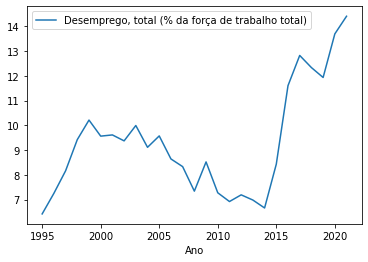

In [ ]:
# Plotando um grafico para visualizar como o desemprego se comportou no brasil
df.plot(x="Ano", y = "Desemprego, total (% da força de trabalho total)")

In [ ]:
df

,Ano,Comércio de mercadorias (% do PIB),"População, total","Expectativa de vida no nascimento, total (anos)",Taxa de mortalidade infantil (por 1.000 nascidos vivos):,"Desemprego, total (% da força de trabalho total)",Índice de Gini,Participação da renda dos 20% mais pobres,"Taxa de mortalidade, menores de 5 anos (por 1.000 nascidos vivos)","Despesa pública na educação, total (% do PIB)",...,"RNB, método Atlas (US$ atual)",Aumento do PIB (% anual),"PIB, (US$ atual)","Inflação, deflator do PIB (% anual)","Indústria, valor agregado (% do PIB)","Agricultura, valor agregado (% do PIB)",Importação de bens e serviços (% do PIB),Exportação de bens e serviços (% do PIB),Assinatura de telefone celular (por 1.000 pessoas),"Dívida do governo central, total (% do PIB)"
0,1995,13.08185,162019889.00000,68.31800,41.10000,6.42000,59.60000,2.40000,48.00000,4.56816,...,556284543006.10095,4.22379,769333330368.98706,93.97804,23.38146,5.01167,9.45558,7.52888,0.79344,NaN
1,1996,12.31476,164614682.00000,68.69500,38.70000,7.25000,59.90000,2.20000,45.00000,NaN,...,725639930024.18103,2.20886,850426433004.07703,18.45624,22.34011,4.76841,8.90538,6.73021,1.51758,NaN
2,1997,13.27391,167209046.00000,69.06100,36.50000,8.16000,59.80000,2.30000,42.20000,NaN,...,852111841920.35901,3.39485,883206452795.12402,7.72902,22.59415,4.68505,9.59256,6.98365,2.72114,NaN
3,1998,12.94322,169785253.00000,69.41900,34.30000,9.42000,59.60000,2.40000,39.60000,4.75666,...,842277987542.46704,0.33810,863711007325.49304,4.92436,22.11879,4.75004,9.40808,7.03050,4.33973,NaN
4,1999,16.63993,172318674.00000,69.76900,32.30000,10.21000,59.00000,2.50000,37.10000,3.80062,...,726412833974.26599,0.46794,599642075004.47095,8.01050,21.74671,4.64598,11.41727,9.56490,8.72378,NaN
5,2000,17.35637,174790339.00000,70.11600,30.40000,9.56100,NaN,NaN,34.70000,3.94893,...,688983514680.02002,4.38795,655448188259.35095,5.60607,23.00662,4.75046,12.45171,10.18805,13.26628,NaN
6,2001,20.83436,177196051.00000,70.46200,28.50000,9.61000,58.40000,2.50000,32.50000,3.84468,...,592701203401.34094,1.38990,559983704094.17004,8.22509,22.63953,4.80104,14.56457,12.37171,16.22258,NaN
7,2002,21.60907,179537523.00000,70.81300,26.80000,9.37000,58.10000,2.60000,30.40000,3.75037,...,555859181296.76501,3.05346,509795270685.19000,9.79811,22.49533,5.47527,13.38777,14.23059,19.42823,NaN
8,2003,22.22797,181809244.00000,71.17000,25.10000,9.99000,57.60000,2.60000,28.40000,NaN,...,543058774579.86499,1.14083,558233724164.71106,14.09102,23.08382,6.16718,12.95960,15.18078,25.50655,NaN
9,2004,24.37078,184006479.00000,71.53100,23.50000,9.11000,56.50000,2.90000,26.50000,3.97448,...,615838333612.02405,5.75996,669289321944.51599,7.75206,24.30662,5.66531,13.13249,16.54576,35.65364,NaN


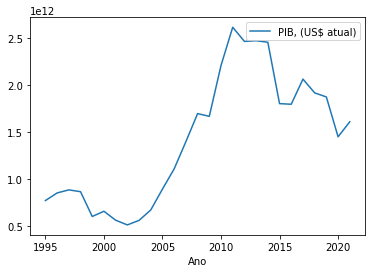

In [ ]:
df.plot(x = "Ano", y= "PIB, (US$ atual)")

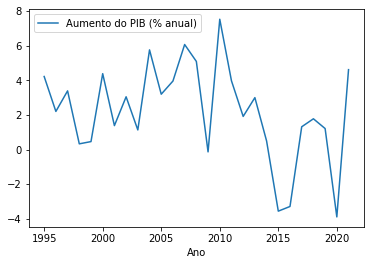

In [ ]:
df.plot(x = "Ano", y= "Aumento do PIB (% anual)")

##***Exportando o produto final***

In [ ]:
df.to_csv("DadosBrasil_Tratado.csv", index=False)

##***Pyspark***

In [ ]:
# Construindo nossa variavel que carrega 
# as funcoes do spark

spark = (SparkSession.builder
         .master("local")
         .appName("Trabalho_IndividualBC23")
         .config("spark.ui.port", "4050")
         .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-latest.jar')

         .getOrCreate()
         )

In [ ]:
# Definindo como o pyspark tem que entender
# as colunas do nosso df 

scheme = (
    StructType([
        StructField("Ano", IntegerType()),
        StructField("Comercio_de_mercadorias (% do PIB)", FloatType()),
        StructField("Populacao_total", FloatType()),
        StructField("Expectativa_de_vida_no_nascimento_total", FloatType()),
        StructField("Taxa_de_mortalidade_infantil", FloatType()),
        StructField("Desemprego_total", FloatType()),
        StructField("indice_de_Gini", FloatType()),
        StructField("Participacao_da_renda_dos_20%_mais_pobres", FloatType()),
        StructField("Taxa_de_mortalidade_menores_de_5_anos", FloatType()),
        StructField("Despesa_publica_na_educação_total", FloatType()),
        StructField("Taxa_de_alfabetizacao_total_de_adultos", FloatType()),
        StructField("RNB_metodo_Atlas", FloatType()),
        StructField("Aumento_do_PIB", FloatType()),
        StructField("Pib_Dolar_atual", FloatType()),
        StructField("Inflacao_deflator_PIB", FloatType()),
        StructField("Industria_valor_agregado", FloatType()),
        StructField("Agricultura_valor_agregado", FloatType()),
        StructField("Importacao_de_bens_e_servico", FloatType()),
        StructField("Exportacao_de_bens_e_servico", FloatType()),
        StructField("Assinatura_de_telefone_celular", FloatType()),        
    ])
)

In [ ]:
# Criando nosso dataframe com configs especificas
# e aplicando nosso schema a ele 

# Aqui estamos passando regras para como o df deve funionar
# e pegando o df tratado no pandas pela gcp
df = ( spark.read.format("csv")
        .option("header", "true")
        .option("inferschema", "true")
        .option("delimiter", ",")
        .load("gs://e8_bucket_tratado/DadosBrasil_Tratado.csv",
          schema=scheme
        )
      )

In [ ]:
df.show()

+----+----------------------------------+---------------+---------------------------------------+----------------------------+----------------+--------------+-----------------------------------------+-------------------------------------+---------------------------------+--------------------------------------+----------------+--------------+---------------+---------------------+------------------------+--------------------------+----------------------------+----------------------------+------------------------------+
| Ano|Comercio_de_mercadorias (% do PIB)|Populacao_total|Expectativa_de_vida_no_nascimento_total|Taxa_de_mortalidade_infantil|Desemprego_total|indice_de_Gini|Participacao_da_renda_dos_20%_mais_pobres|Taxa_de_mortalidade_menores_de_5_anos|Despesa_publica_na_educação_total|Taxa_de_alfabetizacao_total_de_adultos|RNB_metodo_Atlas|Aumento_do_PIB|Pib_Dolar_atual|Inflacao_deflator_PIB|Industria_valor_agregado|Agricultura_valor_agregado|Importacao_de_bens_e_servico|Exportacao_de_b

In [ ]:
# Transformando populacao de Float para int porque nao apresentava
# numeros flutuantes diferentes de 0
df = df.withColumn("Populacao", f.col("Populacao_total")\
                   .cast("int")).drop(f.col("Populacao_total"))

In [ ]:
# Alterando todos os Na, Null ou Nan para NaN
# Conseguimostrabalhar melhor com NaN e mongoDB
df = df.na.fill(value=np.NaN)

In [ ]:
# Aqui verificamos se existem linhas duplicadas
# Se existissem poderiamos usar a funcao dropDuplicates()

print(df.count())
print(df.distinct().count())

27
27
